<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

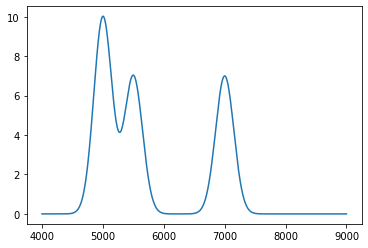

In [145]:
from numpy.random import randn

from squeze.simple_spectrum import SimpleSpectrum

def gaussian(x, amp, mu, sig):
    return amp*np.exp(-(x-mu)**2./(2*sig**2.))

wave = np.arange(4000, 9000, 1, dtype=float)
flux = np.zeros_like(wave)

flux += gaussian(wave, 10, 5000, 100) 
flux += gaussian(wave, 7, 7000, 100)
flux += gaussian(wave, 7, 5500, 150)

ivar = np.ones_like(wave)

noiseless_spec = SimpleSpectrum(flux.copy(), ivar.copy(), wave.copy(), {})

plt.plot(wave, flux)

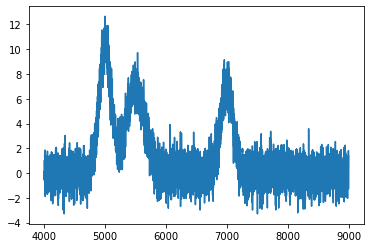

In [114]:
sigma = 1./np.sqrt(ivar)
flux += sigma*randn(flux.size)

spectrum = SimpleSpectrum(flux, ivar, wave, {})

plt.plot(wave, flux)

In [115]:
from squeze.peak_finder import PeakFinder

In [146]:
pf1 = PeakFinder(70, 0)
indexs, significances = pf1.find_peaks(noiseless_spec)
print(indexs)
print(significances)

[1004 1491 3000]
[41.33927132 26.87419641 30.52738474]


In [100]:
pf1.find_peaks(spectrum)

(array([1002, 1490, 2114, 3000, 3921, 4353, 4621]),
 array([38.67571245, 27.63482458,  0.33387756, 32.38635289,  2.48406551,
         2.78557629,  1.66251917]))

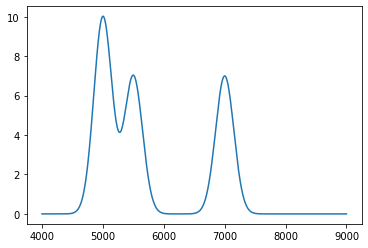

In [128]:
wave = np.arange(4000, 9000, 1, dtype=float)
flux = np.zeros_like(wave)
ivar = np.ones_like(wave)

# add three peaks
peaks_positions = [5000, 5500, 7000]
peak_amplitudes = [10, 7, 7]
peak_sigmas = [150, 150, 150]
for mu, amp, sig in zip(peaks_positions,
                        peak_amplitudes,
                        peak_sigmas):
    flux += gaussian(wave, amp, mu, sig)

# keep the noiseless spectrum
noiseless_spec = SimpleSpectrum(flux.copy(), ivar.copy(),
                                       wave.copy(), {})
plt.plot(noiseless_spec.wave(), noiseless_spec.flux())

{'_testMethodName': 'runTest', '_outcome': None, '_testMethodDoc': 'No test', '_cleanups': [], '_subtest': None, '_type_equality_funcs': {<class 'dict'>: 'assertDictEqual', <class 'list'>: 'assertListEqual', <class 'tuple'>: 'assertTupleEqual', <class 'set'>: 'assertSetEqual', <class 'frozenset'>: 'assertSetEqual', <class 'str'>: 'assertMultiLineEqual'}, '_TestPeakFinder__peaks_positions': [5000, 5500, 7000], '_TestPeakFinder__peak_amplitudes': [10, 7, 7], '_TestPeakFinder__peak_sigmas': [150, 150, 150], '_TestPeakFinder__noiseless_spec': <squeze.simple_spectrum.SimpleSpectrum object at 0x12d1ecef0>}


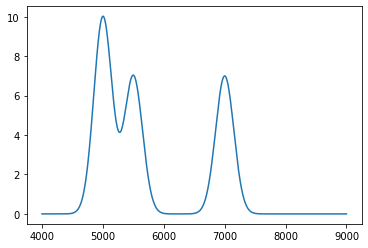

In [135]:
from squeze.tests.test_peakfinder import TestPeakFinder

tpk = TestPeakFinder()
tpk.setUp()
noiseless_spec = tpk._TestPeakFinder__noiseless_spec
plt.plot(noiseless_spec.wave(), noiseless_spec.flux())

In [140]:
tpk.test_significance_cut()

AssertionError: False is not true